In [12]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)


c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
import seaborn as sns

In [14]:
#Only get data analyst jobs in India 
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

#Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

SKILL PAY ANALYSIS CHART 

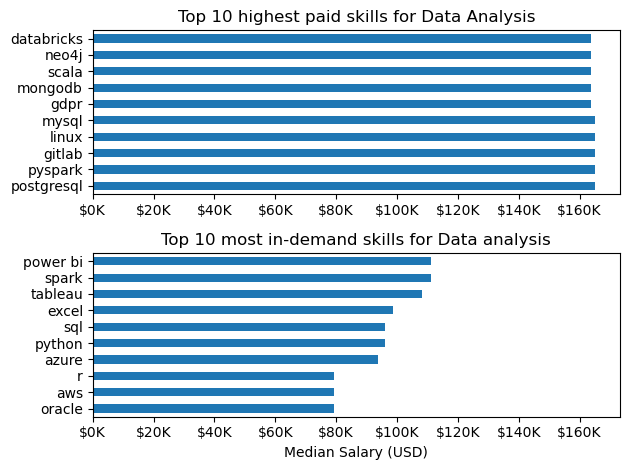

In [15]:
df_DA_IND = df_DA_IND.explode('job_skills')
df_DA_IND['job_skills']
df_DA_IND_grouped = df_DA_IND.groupby(by='job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_IND_grouped.sort_values(by='median',ascending=False).head(10)
df_DA_skills = df_DA_IND_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median',ascending=False).head(10)

# Top 10 highest paid skills fro data analyst
fig, ax = plt.subplots(2,1)
df_DA_top_pay[::-1].plot(kind='barh',y='median', ax=ax[0],legend = False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

#Top 10 Most In-Demand Skills for Data Analyst
df_DA_skills[::-1].plot(kind='barh',y='median', ax=ax[1],legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in-demand skills for Data analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()


SKILL PAY ANALYSIS CHART (WITH SEABORN)

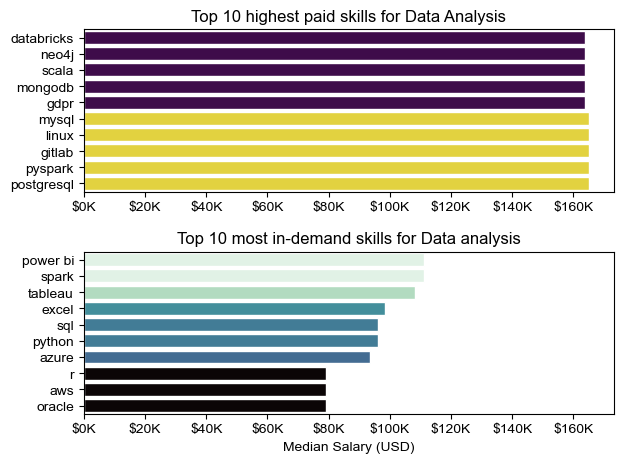

In [16]:
# Top 10 highest paid skills fro data analyst
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')


#df_DA_top_pay[::-1].plot(kind='barh',y='median', ax=ax[0],legend = False)
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='viridis')
ax[0].legend().remove()


ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

#Top 10 Most In-Demand Skills for Data Analyst
#df_DA_skills[::-1].plot(kind='barh',y='median', ax=ax[1],legend = False)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue='median',palette = 'mako')
ax[1].legend().remove()


ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in-demand skills for Data analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()

HISTOGRAM PLOT WITH SEABORN

Text(0, 0.5, 'No. of jobs')

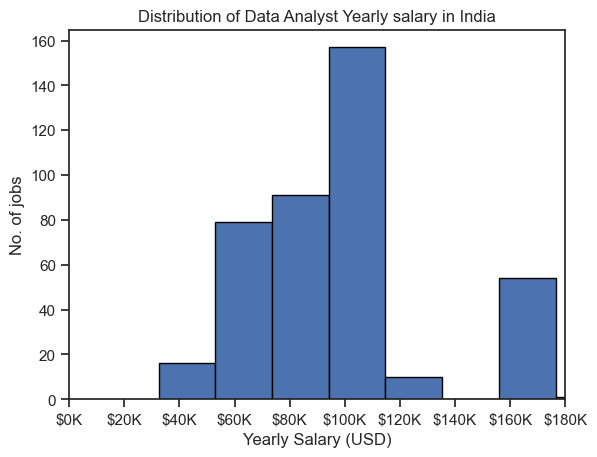

In [17]:
#Normal Histogram plot
df_DA_IND['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0,180000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('No. of jobs')

Text(12.444444444444445, 0.5, 'No. of jobs')

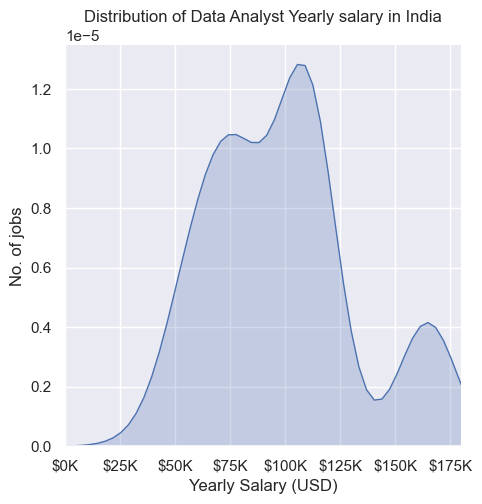

In [18]:
sns.set_theme(style='darkgrid')
sns.displot(df_DA_IND['salary_year_avg'],kind='kde',fill=True)
plt.xlim(0,180000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('No. of jobs')

BOX PLOT WITH SEABORN

C:\Users\DeLL\AppData\Local\Temp\ipykernel_2588\2755513550.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


(0.0, 700000.0)

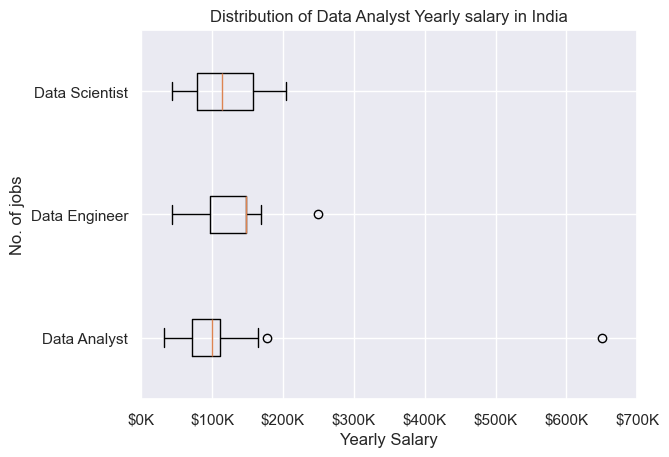

In [19]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

#Filter for job titles in India
df_DA_IND = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

#List of salaries for each job title
job_list = [df_DA_IND[df_DA_IND['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

#Plotting the box plot
plt.boxplot(job_list, labels=job_titles,vert=False)
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('No. of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))
plt.xlim(0,700000)

BOX PLOT WITH SEABORN

(0.0, 700000.0)

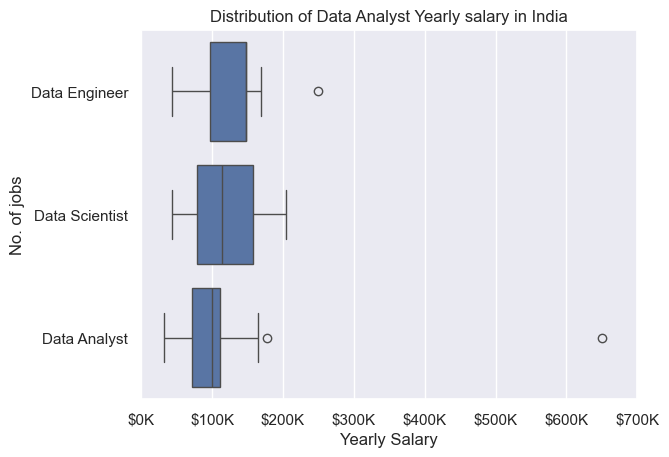

In [21]:
sns.boxplot(data=df_DA_IND, x='salary_year_avg', y='job_title_short')
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('No. of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))
plt.xlim(0,700000)